PCA使用**方差**作为信息量的衡量指标，并且**特征值分解**来找出空间V。降维时，它会通过一系列数学操作（比如说，产生协方差矩阵）将特征矩阵X分解为三个矩阵，其中Σ是一个对角矩阵（即除了对角线上有值，其他位置都是0的矩阵），其**对角线上的元素**就是**方差**。降维完成之后，PCA找到的每个新特征向量就叫“**主成分**”，而被丢弃的特征向量被认为信息量很少，这些信息很可能就是噪音。

SVD使用**奇异值分解**来找出空间V，其中Σ也是一个对角矩阵，不过它**对角线上的元素**是**奇异值**，这也是SVD中用来衡量特征上的信息量的指标。

在数学原理中，无论是PCA和SVD都需要**遍历所有的特征和样本**来计算信息量指标。并且在矩阵分解的过程之中，会产生比原来的特征矩阵更大的矩阵，比如原数据的结构是(m,n)，在矩阵分解中为了找出最佳新特征空间V，可能需要产生(n,n)，(m,m)大小的矩阵，还需要产生协方差矩阵去计算更多的信息。

**特征选择**选完之后的特征依然**具有可解释性**，而PCA（**特征创造**）降维完毕后的特征不是原本的特征矩阵中的任何一个特征，而是新特征，**不具有可读性**。

## 一、重要参数

### （一）n_components：降维后保留的特征数量

如果降维目标是**可视化**，n_components通常取2。

**1.调用库和模块**

In [1]:
import matplotlib.pyplot as plt #可视化
from sklearn.datasets import load_iris #鸢尾花数据集
from sklearn.decomposition import PCA #主成分分析

**2.提取数据集**

In [2]:
iris = load_iris() #数据实例化
y = iris.target
X = iris.data
X.shape #二维数组，有150个样本，4个特征

(150, 4)

In [3]:
import pandas as pd
pd.DataFrame(X) #四维特征矩阵

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**3.建模**

In [5]:
pca = PCA(n_components=2) #实例化，降到2个特征
pca = pca.fit(X) #拟合模型
X_dr = pca.transform(X) #获取新矩阵
#X_dr = PCA(2).fit_transform(X)
X_dr

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [6]:
X_dr.shape

(150, 2)

**4.可视化**

In [7]:
X_dr[y == 0,0] #取出标签为0的第1个特征

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

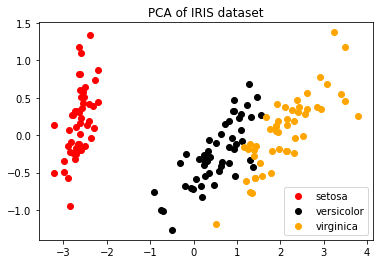

In [9]:
plt.figure() #生成画布
plt.scatter(X_dr[y==0,0],X_dr[y==0,1],c="red",label=iris.target_names[0])
plt.scatter(X_dr[y==1,0],X_dr[y==1,1],c="black",label=iris.target_names[1])
plt.scatter(X_dr[y==2,0],X_dr[y==2,1],c="orange",label=iris.target_names[2])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

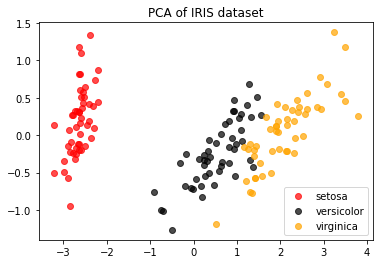

In [10]:
colors = ['red','black','orange']

plt.figure() #生成画布
for i in [0,1,2]:
    plt.scatter(X_dr[y==i,0]
                ,X_dr[y==i,1]
                ,alpha=0.7 #透明度
                ,c=colors[i]
                ,label=iris.target_names[i])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

**5.探索降维后的数据**

In [11]:
#查看主成分所带信息量大小（可解释性方差的大小）
pca.explained_variance_

array([4.22824171, 0.24267075])

In [12]:
#查看主成分的可解释方差贡献率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [13]:
#累积到第二个主成分的方差累计贡献率
pca.explained_variance_ratio_.sum()

0.9776852063187949

**6.选择最好的n_components：累计可解释方差贡献率曲线**

累积可解释方差贡献率曲线是一条以**降维后保留的特征个数**为横坐标，降维后新特征矩阵捕捉到的**可解释方差贡献率**为纵坐标的曲线，能够帮助我们决定n_components最好的取值。

In [14]:
pca_line = PCA().fit(X) #n_components不填，默认返回min(X.shape)个特征
pca_line.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

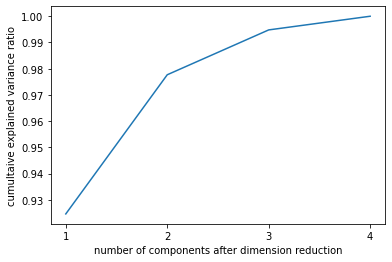

In [15]:
import numpy as np
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumultaive explained variance ratio") #累计可解释方差贡献率
plt.show()

**7.最大似然估计自选超参数：n_components="mle"**

In [16]:
pca_mle = PCA(n_components="mle") #实例化，使用最大似然估计方法自选超参数
pca_mle = pca_mle.fit(X) #拟合模型
X_mle = pca_mle.transform(X) #获取新矩阵

In [17]:
X_mle #mle选择了3个特征

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [18]:
pca_mle.explained_variance_ratio_.sum()

0.9947878161267246

**8.按信息量占比选超参数**

输入[0,1]之间的**浮点数**，并且让参数**svd_solver='full'**，表示希望降维后的**总解释性方差**占比大于n_components指定的百分比，即希望**保留百分之多少的信息量**。

（1）n_components=0.97

In [19]:
pca_f = PCA(n_components=0.97,svd_solver="full")
pca_f = pca_f.fit(X)
x_f = pca_f.transform(X)

In [20]:
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [21]:
pca_f.explained_variance_ratio_.sum()

0.9776852063187949

（2）n_components=0.99

In [22]:
pca_f = PCA(n_components=0.99,svd_solver="full")
pca_f = pca_f.fit(X)
x_f = pca_f.transform(X)

In [23]:
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [24]:
pca_f.explained_variance_ratio_.sum()

0.9947878161267246

PCA中的SVD。sklearn将降维流程拆成了两部分：一部分是**计算特征空间**V，由**奇异值分解**完成，另一部分是**映射数据和求解新特征矩阵**，由**主成分分析**完成，实现了用SVD的性质**减少计算量**（不计算协方差矩阵），却让信息量的**评估指标是方差**（奇异值不好理解）。

In [25]:
PCA(2).fit(X).components_ #降维后的特征矩阵V(k,n)

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [26]:
PCA(2).fit(X).components_.shape #(k,n)

(2, 4)

In [27]:
X.shape #(m,n)

(150, 4)

### （二）svd_solver

**1.svd_solver='auto'**（默认）

基于X.shape和n_components的默认策略来选择分解器：如果输入数据的尺寸大于500x500且要提取的特征数小于数据最小维度min(X.shape)的80％，就启用效率更高的"randomized"方法。否则，精确完整的SVD将被计算（生成完整的U、Σ和V转置），截断将会在矩阵被分解完成后有选择地发生。

**2.svd_solver='full'**

从`scipy.linalg.svd`中调用标准的LAPACK分解器来生成精确完整的SVD，适合数据量比较适中，计算时间充足的情况。

**3.svd_solver='arpack'**

从`scipy.sparse.linalg.svds`调用ARPACK分解器来运行截断奇异值分解(SVD truncated)，分解时就将特征数量降到n_components中输入的数值k，可以加快运算速度，适合特征矩阵很大的时候，但一般用于特征矩阵为稀疏矩阵的情况，此过程包含一定的随机性。

**4.svd_solver='randomized'**

通过Halko等人的随机方法进行随机SVD。在"full"方法中，分解器会根据原始数据和输入的n_components值去计算和寻找符合需求的新特征向量，但是在"randomized"方法中，分解器会先生成多个随机向量，然后一一去检测这些随机向量中是否有任何一个符合我们的分解需求，如果符合，就保留这个随机向量，并基于这个随机向量来构建后续的向量空间。这个方法已经被Halko等人证明，比"full"模式下计算快很多，并且还能够保证模型运行效果。适合特征矩阵巨大，计算量庞大的情况。详见《Finding structure with randomness: Probabilistic algorithms for constrcting approximate matrix decompositions》。

### （三）random_state

在参数svd_solver的值为"arpack"或"randomized"的时候生效，可以控制这两种SVD模式中的随机模式。

## 二、重要属性：components_

**1.导入库和模块**

In [28]:
from sklearn.datasets import fetch_lfw_people #7个人的1000多张照片组成的人脸数据
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

**2.实例化数据集，探索数据**

In [29]:
faces = fetch_lfw_people(min_faces_per_person=60) #实例化，每个人取出多少张照片

In [30]:
faces.data.shape #字典

(1277, 2914)

In [31]:
faces.images.shape #对于图像来说这才是特征矩阵

(1277, 62, 47)

1277图像的个数，每个图像有62\*47=2914个像素；<br>
62是每个图像的特征矩阵的行；<br>
47是每个图像的特征矩阵的列。

In [32]:
X = faces.data

**3.将原特征矩阵进行可视化**

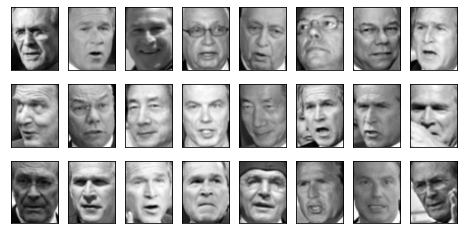

In [33]:
#fig是画布，axes是一串matplotlib对象，.shape共3行8列24张子图；需要对axes里的对象逐一处理，填入fig
fig, axes = plt.subplots(3 #行
                        ,8 #列
                        ,figsize=(8,4) #画布大小
                        ,subplot_kw = {"xticks":[],"yticks":[]} #不显示坐标轴
                        )

for i,ax in enumerate(axes.flat):#i是索引，ax是画图对象
    ax.imshow(faces.images[i,:,:] #填充画布
             ,cmap="gray" #选择色彩的模式
             )

In [34]:
axes.shape

(3, 8)

In [35]:
axes.flat #降成一维列表

In [36]:
[*enumerate(axes.flat)] #索引和画布对象组成的20个元组

[(0, <matplotlib.axes._subplots.AxesSubplot at 0x1b934dd9670>),
 (1, <matplotlib.axes._subplots.AxesSubplot at 0x1b934dc6880>),
 (2, <matplotlib.axes._subplots.AxesSubplot at 0x1b934e3e2b0>),
 (3, <matplotlib.axes._subplots.AxesSubplot at 0x1b934e69790>),
 (4, <matplotlib.axes._subplots.AxesSubplot at 0x1b934e95c70>),
 (5, <matplotlib.axes._subplots.AxesSubplot at 0x1b934ecf220>),
 (6, <matplotlib.axes._subplots.AxesSubplot at 0x1b934ef9730>),
 (7, <matplotlib.axes._subplots.AxesSubplot at 0x1b935d75c10>),
 (8, <matplotlib.axes._subplots.AxesSubplot at 0x1b935db1130>),
 (9, <matplotlib.axes._subplots.AxesSubplot at 0x1b935ddc610>),
 (10, <matplotlib.axes._subplots.AxesSubplot at 0x1b935e09af0>),
 (11, <matplotlib.axes._subplots.AxesSubplot at 0x1b935e34fa0>),
 (12, <matplotlib.axes._subplots.AxesSubplot at 0x1b935e6d520>),
 (13, <matplotlib.axes._subplots.AxesSubplot at 0x1b935e99a00>),
 (14, <matplotlib.axes._subplots.AxesSubplot at 0x1b935ec5f10>),
 (15, <matplotlib.axes._subplots.Ax

cmap网站：https://matplotlib.org/stable/tutorials/colors/colormaps.html

**4.建模降维，提取新特征空间矩阵**

In [37]:
#由原本2914维降到150维，不能单独降62或47
pca = PCA(150).fit(X)
V = pca.components_
V.shape #映射数据之前的新特征向量空间V(k,n)

(150, 2914)

**5.将新特征空间矩阵可视化**

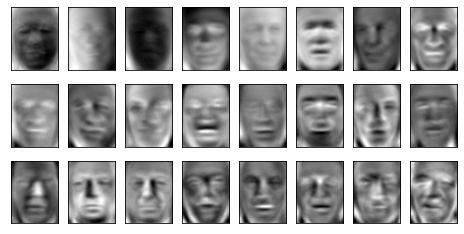

In [38]:
fig, axes = plt.subplots(3
                        ,8
                        ,figsize=(8,4)
                        ,subplot_kw={"xticks":[],"yticks":[]}
                        )
for i,ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47) #还原
             ,cmap="gray"
             )

比起降维前的数据，新特征空间可视化后的人脸非常模糊，这是因为原始数据还没有被映射到特征空间中。但是可以看出，整体比较亮的图片，获取的信息较多，眼睛，鼻子，嘴巴，都相对清晰，脸的轮廓，头发之类的比较模糊。整体比较暗的图片，只能看见黑漆漆的一块。<br>
这说明，新特征空间里的特征向量们，大部分是"五官"和"亮度"相关的向量，所以新特征向量上的信息肯定大部分是由原数据中和"五官"和"亮度"相关的特征中提取出来的。到这里，我们通过可视化新特征空间V，解释了一部分降维后的特征：虽然显示出来的数字看着不知所云，但画出来的图表示，这些特征是和"五官"以及"亮度"有关的。这也再次证明了，PCA能够将原始数据集中重要的数据进行聚集。

In [39]:
X_dr = pca.transform(X)
X_dr.shape #映射之后的特征矩阵

(1277, 150)

## 三、重要接口：inverse_transform

### （一）用人脸识别看PCA降维后的信息保存量

**1.导入库和模块**

In [40]:
from sklearn.datasets import fetch_lfw_people #7个人的1000多张照片组成的人脸数据
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

**2.导入数据，探索数据**

In [41]:
faces = fetch_lfw_people(min_faces_per_person=60)
faces.data.shape

(1277, 2914)

In [42]:
faces.images.shape

(1277, 62, 47)

In [43]:
X = faces.data

**3.建模降维，获取降维后的特征矩阵**

In [44]:
pca = PCA(150) #实例化
X_dr = pca.fit_transform(X) #拟合+提取结果
X_dr.shape

(1277, 150)

**4.将降维后的矩阵用inverse_transform返回原空间**

In [45]:
X_inverse = pca.inverse_transform(X_dr) #期待X_inverse与X一样
X_inverse.shape

(1277, 2914)

**5.将特征矩阵X和X_inverse可视化**

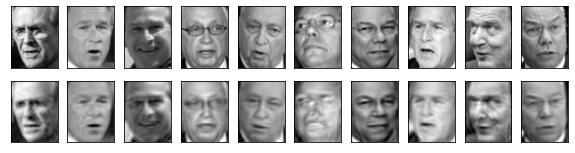

In [46]:
fig, ax = plt.subplots(2
                      ,10
                      ,figsize=(10,2.5)
                      ,subplot_kw={"xticks":[],"yticks":[]}
                      )
for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_inverse[i].reshape(62,47),cmap="binary_r")

这两组数据可视化后，由降维后再通过inverse_transform转换回原维度的数据画出的图像和原数据画的图像大致相似，但原数据的图像明显更加清晰。这说明，inverse_transform并没有实现数据的完全逆转。这是因为，在降维的时候，部分信息已经被舍弃了，X_dr中往往不会包含原数据100%的信息，所以在逆转的时候，即便维度升高，原数据中已经被舍弃的信息也不可能再回来了。所以，**降维不是完全可逆的**。

### （二）用PCA做噪音过滤

inverse_transform能够在不恢复原始数据的情况下，将降维后的数据返回到原本的高维空间，即是说能够实现“**保证维度，但去掉方差很小特征所带的信息**”。利用inverse_transform的这个性质，能够实现噪音过滤。

**1.导入库和模块**

In [47]:
from sklearn.datasets import load_digits #手写数据集
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

**2.导入数据，探索数据**

In [48]:
digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [49]:
set(digits.target.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [50]:
digits.data.shape

(1797, 64)

**3.定义画图函数**

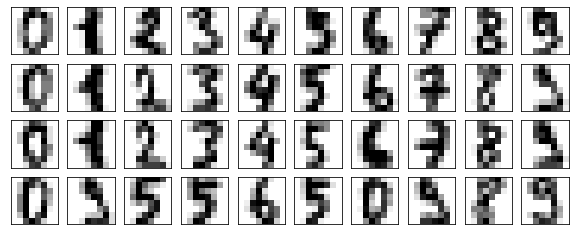

In [51]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4) #4行10列
                            ,subplot_kw = {"xticks":[],"yticks":[]}
                            )
    #data的结构必须是(m,n)，并且n要能够被分成(8,8)这样的结构
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")

plot_digits(digits.data)

**4.为数据加上噪音**

In [52]:
#在指定的数据集中，随机抽取服从正态分布的数据
rng = np.random.RandomState(42)

#两个参数，分别是指定的数据集和抽取出来的正态分布的方差
noisy = rng.normal(digits.data,2)

In [53]:
noisy.shape

(1797, 64)

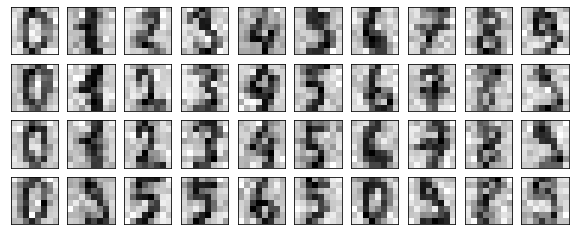

In [54]:
plot_digits(noisy)

**5.降维**

In [55]:
pca = PCA(0.5,svd_solver='full').fit(noisy) #保留50%的信息量
X_dr = pca.transform(noisy)
X_dr.shape #维度：64降到6

(1797, 6)

**6.逆转降维结果，实现降噪**

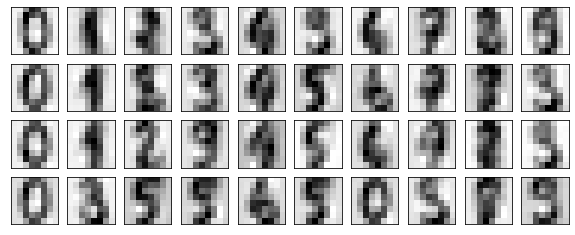

In [56]:
without_noise = pca.inverse_transform(X_dr)
plot_digits(without_noise)

## 四、总结

### （一）重要参数

n_components, svd_solver, random_state；

### （二）重要属性

components, explained_variance_, explained_variance_ratio_；

### （三）重要接口

fit, transform, fit_transform, inverse_transform。